In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData



/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want

In [4]:
from lsst.sims.catUtils.baseCatalogModels import SNObj

In [5]:
s  = SNObj()

In [6]:
names = s.get_column_names()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geocenter'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geobox'
  return fn(*arg, **kw)


In [7]:
for key in names:
    if 'snra' in names[key]:
        print key

TwinkSN


In [8]:
print names['TwinkSN']

['galtileid', 'htmid', 'snid', 't0', 'c', 'x1', 'x0', 'redshift', 'snra', 'sndec', 'cx', 'cy', 'cz']


In [9]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'Tsnid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}



In [10]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [11]:
TwinklesObsMetaDataSmall = ObservationMetaData(boundType='circle',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=0.15, mjd=60703.0, bandpassName='r', m5=23.)

In [12]:
TwinklesObsMetaDataSmall.bandpass

'r'

In [13]:
#tsmall = SNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [14]:
#tsmall.write_catalog('TwinklesSN.dat')

In [15]:
#!wc -l TwinklesSN.dat

In [16]:
#!head TwinklesSN.dat

In [17]:
#Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [18]:
#Ttsmall.write_catalog('TTwinklesSN.dat')

In [19]:
#!head TTwinklesSN.dat

In [20]:
from lsst.sims.catUtils.mixins import TwinkSNCat

In [21]:
TwinklesObsMetaDataSmall.bandpass

'r'

In [22]:
sncatalog = TwinkSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'sndec', 'Tsnid', 'Tx0', 'Tt0', 'flux', 'flux_err', 'mag', 'mag_err'])

('badvalues ', nan)
('mjd ', 60703.0)
('maxTime', 100.0)
('number of cases ', 0)


In [23]:
sncatalog.suppressDimSN 

True

In [24]:
sncatalog.write_catalog('newcat.dat')

('badvalues ', nan)
('mjd ', 60703.0)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)

/Users/rbiswas/src/LSST/sims_catutils/python/lsst/sims/catUtils/supernovae/snObject.py:548: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(fluxinMaggies)
/Users/rbiswas/src/LSST/sims_photutils/python/lsst/sims/photUtils/SignalToNoise.py:356: RuntimeWarning: divide by zero encountered in double_scalars
  fluxRatio = m5Flux/sourceFlux
/Users/rbiswas/src/LSST/sims_catutils/python/lsst/sims/catUtils/supernovae/snObject.py:592: RuntimeWarning: invalid value encountered in double_scalars
  return fluxinMaggies / SNR
/Users/rbiswas/src/LSST/sims_photutils/python/lsst/sims/photUtils/SignalToNoise.py:258: RuntimeWarning: divide by zero encountered in double_scalars
  return 2.5*numpy.log10(1.0+1.0/snr)
/Users/rbiswas/src/LSST/sims_catutils/python/lsst/sims/catUtils/supernovae/snObject.py:548: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(fluxinMaggies)



('mjd ', 60703.0)
('maxTime', 100.0)
('number of cases ', 48186)


In [25]:
!wc -l newcat.dat

    2738 newcat.dat


In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('newcat.dat', sep=',\s+')
df.rename(columns={'#snid':'snid'}, inplace=True)

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [28]:
sncatalog.mjdobs

60703.0

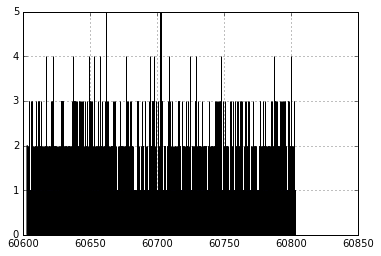

In [29]:
df.t0.hist(bins=4000)

In [30]:
df['DeltaT'] = sncatalog.mjdobs - df['t0']
df['SNR'] = df.flux / df.flux_err
df.head()

,snid,snra,sndec,z,t0,c,x1,x0,Tsnid,Tx0,Tt0,flux,flux_err,mag,mag_err,DeltaT,SNR
0,6.000015e+10,0.927020,-0.485500,0.6332,60611.8773,-0.178086,-1.1921,0.000009,6.000015e+10,0.0000,1031.8773,0.000000e+00,NaN,inf,inf,91.1227,NaN
1,1.000006e+16,0.926962,-0.485504,0.4054,60621.6185,-0.009385,0.6193,0.000021,1.000006e+16,0.0000,1041.6185,0.000000e+00,NaN,inf,inf,81.3815,NaN
2,6.001344e+10,0.927382,-0.485643,0.2033,60757.6829,0.039469,1.2090,0.000092,6.001344e+10,0.0001,1177.6829,0.000000e+00,NaN,inf,inf,-54.6829,NaN
3,2.000006e+16,0.927277,-0.485492,0.5229,60713.6143,0.007213,-1.0857,0.000011,2.000006e+16,0.0000,1133.6143,5.663650e-10,1.261530e-10,23.117300,0.218394,-10.6143,4.489509
4,2.000006e+16,0.927289,-0.485549,0.7205,60629.1945,-0.030405,0.8010,0.000004,2.000006e+16,0.0000,1049.1945,1.139955e-11,1.258225e-10,27.357800,2.701345,73.8055,0.090600


In [31]:
df.query('SNR > 5.').SNR.size

153

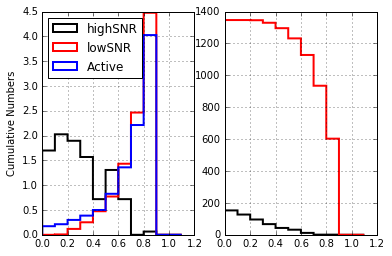

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(df.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[0].set_ylabel('Num SN at z > ')
ax[1].set_y

In [66]:
np.arange(1.2, 0., -0.1)

array([ 1.2,  1.1,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,
        0.1])

In [100]:
x = ["{:.4f}".format(elem) for elem in np.random.uniform(0., 10., size=10)]

In [101]:
x

['9.6708',
 '2.5299',
 '3.7739',
 '1.6766',
 '6.2631',
 '3.7246',
 '7.3926',
 '7.2217',
 '1.2430',
 '5.6297']

In [69]:
import string

In [70]:
a = list(string.ascii_lowercase[:10])

In [75]:
A = list(string.ascii_uppercase[:10])

In [84]:
['_'.join(y) for y in zip(a, x, A)]

['a_0_A',
 'b_1_B',
 'c_2_C',
 'd_3_D',
 'e_4_E',
 'f_5_F',
 'g_6_G',
 'h_7_H',
 'i_8_I',
 'j_9_J']

In [103]:
import sncosmo
model = sncosmo.Model(source='salt2')

In [104]:
source = model.source

In [106]:
type(source)

sncosmo.models.SALT2Source

In [107]:
wave = np.arange(3000., 8000., 100.)

In [109]:
source.flux(phase=0., wave=wave)

array([  1.51821643e-13,   2.01121812e-13,   2.08427421e-13,
         1.95659443e-13,   2.50164794e-13,   3.39228571e-13,
         4.16126150e-13,   2.33985154e-13,   2.32739993e-13,
         5.00998988e-13,   4.54198223e-13,   5.17432334e-13,
         4.15730334e-13,   2.67473169e-13,   3.29565220e-13,
         3.98363952e-13,   3.71345748e-13,   2.75218901e-13,
         2.40343084e-13,   2.13815708e-13,   2.14282382e-13,
         2.78209140e-13,   2.64562402e-13,   1.82683517e-13,
         1.92838318e-13,   1.92384176e-13,   2.29275147e-13,
         2.12807132e-13,   2.00713495e-13,   2.04812238e-13,
         1.83106060e-13,   8.40483761e-14,   1.28253665e-13,
         1.70731679e-13,   1.61128578e-13,   1.37107479e-13,
         1.22545391e-13,   1.05738111e-13,   9.69410068e-14,
         8.71713998e-14,   7.99252119e-14,   7.72159089e-14,
         7.21523350e-14,   6.30115948e-14,   5.47933681e-14,
         4.29502791e-14,   4.63174125e-14,   5.72376526e-14,
         6.04039835e-14,

In [112]:
model.get('t0')

0.0

In [115]:
source.flux(phase=0, wave=source._wave)

array([ -5.59590492e-34,   1.22304172e-16,   4.90344194e-16,
         1.10581086e-15,   1.97039423e-15,   3.08578354e-15,
         4.45366706e-15,   6.04207885e-15,   7.37450842e-15,
         8.29384844e-15,   8.79731243e-15,   8.88211620e-15,
         8.54547803e-15,   7.78461891e-15,   6.82209030e-15,
         6.23760896e-15,   6.06309582e-15,   6.30121393e-15,
         6.95462290e-15,   8.02597866e-15,   9.49674615e-15,
         1.08841598e-14,   1.19851867e-14,   1.27980009e-14,
         1.33207796e-14,   1.35517032e-14,   1.34889553e-14,
         1.32990714e-14,   1.32820392e-14,   1.34448263e-14,
         1.37885235e-14,   1.43142191e-14,   1.50229987e-14,
         1.58596743e-14,   1.65159039e-14,   1.69435788e-14,
         1.71413446e-14,   1.71078503e-14,   1.68417489e-14,
         1.63598385e-14,   1.59831755e-14,   1.58310814e-14,
         1.59048386e-14,   1.62057258e-14,   1.67350174e-14,
         1.74909768e-14,   1.81945829e-14,   1.86619239e-14,
         1.88916910e-14,